In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
import os

# Set the SSL certificate path to a trusted certificate bundle file
os.environ['REQUESTS_CA_BUNDLE'] = '/path/to/certificate_bundle.pem'


In [45]:
iris = pd.read_csv('iris.csv')

In [46]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


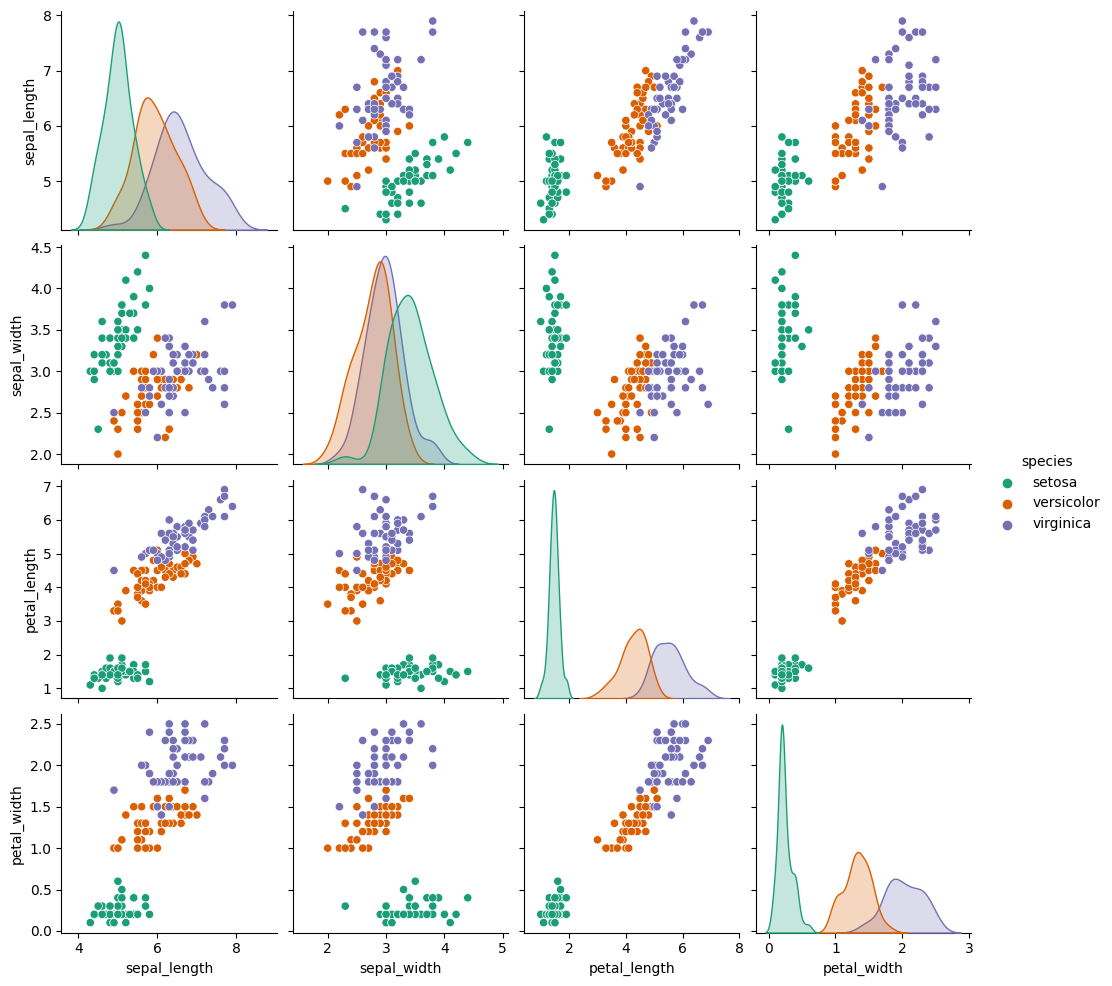

In [26]:
sns.pairplot(iris, hue = 'species', palette='Dark2')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1826: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


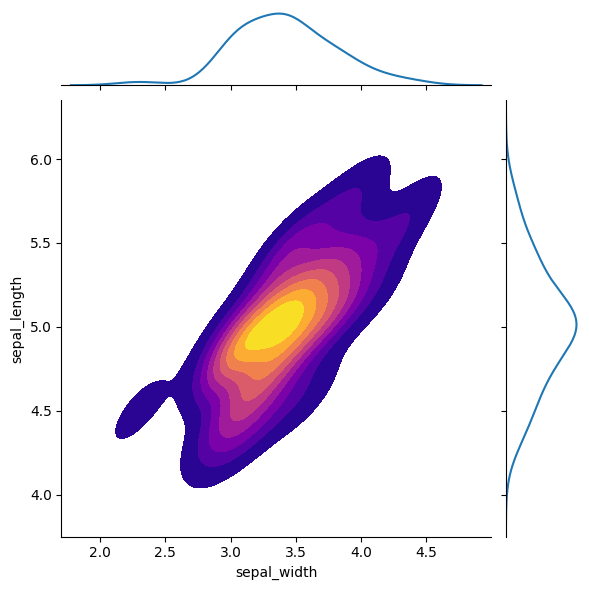

In [27]:


setosa = iris[iris['species'] == 'setosa']


sns.jointplot(x='sepal_width', y='sepal_length', data=setosa, kind='kde', cmap='plasma',shade=True, shade_lowest=False)

# Show the plot
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC()

In [32]:
model.fit(X_train, y_train)

SVC()

In [33]:
pred = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[11  0  0]
 [ 0 19  2]
 [ 0  0 13]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        21
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [38]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [39]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.857 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.667 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [40]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [41]:
grid_pred = grid.predict(X_test)

In [42]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[11  0  0]
 [ 0 18  3]
 [ 0  0 13]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.86      0.92        21
   virginica       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45

